                                            SUPERMART GROCERY DATASCIENCE PROJECT

In [1]:
import pandas as pd  # For Data Cleaning and Manipulation

In [2]:
import numpy as np  # For Numerical Analysis

In [3]:
import matplotlib.pyplot as plt # For Visualisation of data

In [4]:
import pygwalker as pg

In [5]:
import seaborn as sns # For further visualisaton of data

In [6]:
import hashlib # For Data Integrity checks and cryptography

In [7]:
from datetime import datetime # Convert the Order date column to Datetime formate

In [8]:
from sklearn.cluster import KMeans #To efficiently partition data

In [9]:
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test

In [10]:
from sklearn.preprocessing import MinMaxScaler # TO Normalizing data and improving the performance of ML algorithms

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  #To evaluate the performance of regression models

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  # For building seasonal autoregression

In [13]:
from statsmodels.tools.eval_measures import rmse  #To access the accuracy of a models prediction

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # Visualize autocorrelation and partial autocorrelation of time series

In [15]:
import itertools #Helps to simplify complex iterations and improve performance 

In [16]:
#Read the dataset
df=pd.read_csv("supermart sales.csv")

#Read some rows in Data
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [17]:
#Display the columns of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [18]:
#The 'Order Date' their in 'Object' data type
#Convert that to 'DateTime' datatype
#Checking the unique value in 'Order Date' 
df["Order Date"].unique()

array(['11-08-2017', '06-12-2017', '10-11-2016', ..., '3/16/2015',
       '8/29/2016', '04-06-2017'], dtype=object)

In [19]:
#Since the 'Order Date' format has variability need to convert them to DateTime Format
#Convert 'Order Date' column into 'DateTime' Datetype
def parse_date(date_str):
    formats=[
        "%d-%m-%Y",  # dd-mm-yyyy
        "%d-%m-%y",  # dd-mm-yy
        "%m-%d-%Y",  # mm-dd-yyyy
        "%m-%d-%y",  # mm-dd-yy
        "%Y-%m-%d",  # yyyy-mm-dd 
        "%d/%m/%Y",  # dd/mm/yyyy
        "%d/%m/%y",  # dd/mm/yy
        "%m/%d/%Y",  # mm/dd/yyyy
        "%m/%d/%y",  # mm/dd/yy
        "%Y/%m/%d"   #yyyy/mm/dd
    ]
    for frmt in formats:
        try:
            return pd.to_datetime(date_str,format=frmt)
        except ValueError:
            continue
    return pd.NaT

df["Order Date"]=df["Order Date"].apply(parse_date)
df["Order Date"].dtypes

dtype('<M8[ns]')

In [20]:
#Check the Null values
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [21]:
#Delete Any duplicates the Duplicates
df.drop_duplicates(subset="Order ID", keep='last', inplace=True)

In [22]:
df.describe(include=["object","category"])

,Order ID,Customer Name,Category,Sub Category,City,Region,State
count,9994,9994,9994,9994,9994,9994,9994
unique,9994,50,7,23,24,5,1
top,OD1,Amrish,Snacks,Health Drinks,Kanyakumari,West,Tamil Nadu
freq,1,227,1514,719,459,3203,9994


In [23]:
#For furher Analysis it is better to have Customer Id than a Customer Name to avoid duplication
df["Customer_Id"] = df.apply(lambda row: hashlib.md5((row["Customer Name"] + row["City"] + row["Region"]).encode()).hexdigest(),axis=1)

In [24]:
df["State"].unique()

array(['Tamil Nadu'], dtype=object)

In [25]:
#Deleting 'State' column
df.drop(columns="State", inplace=True)
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'Customer_Id'],
      dtype='object')

In [26]:
#Describing the Numerical Columns
df.describe()

,Order Date,Sales,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000
mean,2017-04-11 12:33:42.973784064,1496.596158,0.226817,374.937082
min,2015-01-02 00:00:00,500.000000,0.100000,25.250000
25%,2016-05-01 00:00:00,1000.000000,0.160000,180.022500
50%,2017-05-30 00:00:00,1498.000000,0.230000,320.780000
75%,2018-04-09 00:00:00,1994.750000,0.290000,525.627500
max,2018-12-30 00:00:00,2500.000000,0.350000,1120.950000
std,NaN,577.559036,0.074636,239.932881


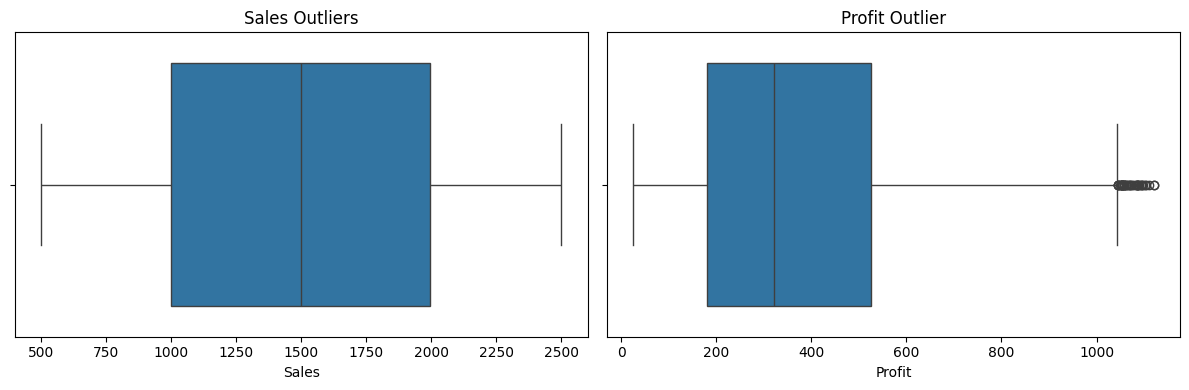

In [27]:
#Visualisation to konw the distribution of Sales and Profit
fig,axs=plt.subplots(1,2,figsize=(12,4))

#box plot to know the outlier 
sns.boxplot(data=df,x="Sales",ax=axs[0])
axs[0].set_title("Sales Outliers")

sns.boxplot(data=df,x="Profit",ax=axs[1])
axs[1].set_title("Profit Outlier")

plt.tight_layout()
plt.show()

In [28]:
#Finding IQR , lower bound and upper bound
Q1=df['Profit'].quantile(0.25)   #Finding 25% range
Q3=df['Profit'].quantile(0.75)   #Finding 75% range
IQR=Q3-Q1                                # Calculating IQR
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 

In [29]:
#Identifying the Outlier using IQR threshold.  
df_outliers=df[(df['Profit']< lower_bound ) | (df['Profit'] > upper_bound)]

#Identify Clean data excluding Outliers
df_supermart=df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]


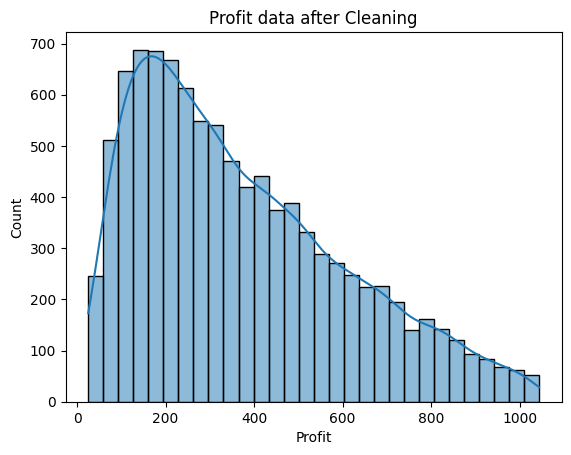

In [30]:
#Creating a Histogram to know the quality of data of profit column after it has been cleaning
sns.histplot(data=df_supermart,x="Profit",kde=True, bins=30)
plt.title("Profit data after Cleaning")
plt.show()

In [31]:
df_supermart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9951 non-null   object        
 1   Customer Name  9951 non-null   object        
 2   Category       9951 non-null   object        
 3   Sub Category   9951 non-null   object        
 4   City           9951 non-null   object        
 5   Order Date     9951 non-null   datetime64[ns]
 6   Region         9951 non-null   object        
 7   Sales          9951 non-null   int64         
 8   Discount       9951 non-null   float64       
 9   Profit         9951 non-null   float64       
 10  Customer_Id    9951 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 932.9+ KB


                                                CUSTOMER INSIGHTS

Custemer Segmentation : Categorizing Customer Based on their Purchasng Behaviour

In [32]:
#Find out Order Frequency
customer_frequency=df_supermart.groupby(["Customer_Id","Customer Name"])["Order ID"].count().reset_index()

#Find out the Sum of Sales for each customer
customer_sales=df_supermart.groupby("Customer_Id")["Sales"].sum().reset_index()

#Time since the last purchase for each customer
latest_date = df_supermart["Order Date"].max()
customer_recency = df_supermart.groupby("Customer_Id").agg({
    "Order Date":lambda x : (latest_date - x.max()).days
}).reset_index()

#Merge the above three dataframes to calculate Frequency,Sales,Recency scores
CustomerScores = customer_frequency.merge(customer_sales,on="Customer_Id").merge(customer_recency,on="Customer_Id")
CustomerScores.columns=["Customer ID","Customer Name","Frequency","Total Sales","Recency"]

#Assign FSR scores
CustomerScores["F_Score"]=pd.qcut(CustomerScores["Frequency"],3,labels=[1,2,3])
CustomerScores["S_Score"]=pd.qcut(CustomerScores["Total Sales"],3,labels=[1,2,3])
CustomerScores["R_Score"]=pd.qcut(CustomerScores["Recency"],3,labels=[3,2,1])

#Calculate Customer Segmentation Score
CustomerScores["Segmentation Score"]=CustomerScores[["F_Score","S_Score","R_Score"]].sum(axis=1)

    

In [33]:
#Segmentation based on CSS
def assign_segment(row):
    if row["Segmentation Score"] > 8:
        return "Loyalist"
    elif 5 <= row["Segmentation Score"]< 8:
        return "Intermitted Shoppers"
    else:
        return "Seasonal Shoppers"

#Customer Segmentation
CustomerScores["Customer Segmentation"]=CustomerScores.apply(assign_segment,axis=1)

CustomerScores["F_Score"] = CustomerScores["F_Score"].astype(float)
CustomerScores["S_Score"] = CustomerScores["S_Score"].astype(float)
CustomerScores["R_Score"] = CustomerScores["R_Score"].astype(float)

#To Visualise in Tableau
CustomerScores.to_csv("Customer Insight.csv",index=False)

#Creating Pivot Table
pivot_table = CustomerScores.pivot_table(
    values = ["F_Score","S_Score","R_Score","Segmentation Score"],
    index = "Customer Segmentation",
    aggfunc="mean"
)
pivot_table.head()

,F_Score,R_Score,S_Score,Segmentation Score
Customer Segmentation,,,,
Intermitted Shoppers,1.461043,2.266550,2.111892,5.839484
Loyalist,3.000000,3.000000,3.000000,9.000000
Seasonal Shoppers,1.414963,1.567581,1.695761,4.678304


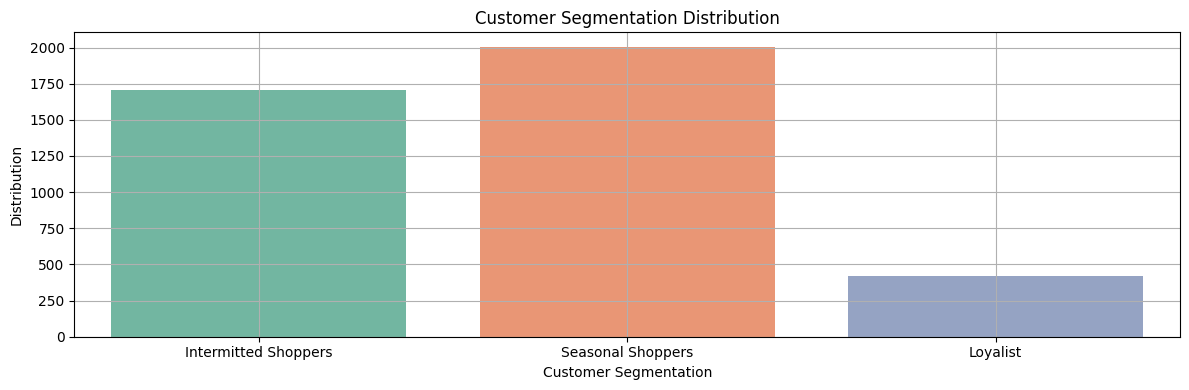

In [34]:
#Visualising Customer Segmentation
plt.figure(figsize=(12,4))
sns.countplot(data=CustomerScores,x="Customer Segmentation",hue="Customer Segmentation",palette="Set2")
plt.title("Customer Segmentation Distribution")
plt.xlabel("Customer Segmentation")
plt.ylabel("Distribution")
plt.tight_layout()
plt.grid(True)
plt.show()

In [35]:
#Extract year-month for pattern analysis
df_supermart = df_supermart.copy()
df_supermart.loc[:,"Order Month"] = df_supermart["Order Date"].dt.to_period("M")

#Calculate total purchases per customer per month
monthly_purchases = df_supermart.groupby(["Customer_Id","Customer Name","Order Month"])["Order ID"].nunique().reset_index()
monthly_purchases.rename(columns = {"Order ID":"Purchase Frequency"},inplace=True)

#Calculate Average purchase frequency for each customer
purchasing_pattern = monthly_purchases.groupby("Customer Name")["Purchase Frequency"].mean().reset_index()
purchasing_pattern.rename(columns = {"Purchase Frequency" : "Avg_Purchase Frequency"},inplace=True)

#Normalise the frequency to create the index
purchasing_pattern["Purchasing Pattern Index"]=(
    (purchasing_pattern["Avg_Purchase Frequency"] - purchasing_pattern["Avg_Purchase Frequency"].min())
     / (purchasing_pattern["Avg_Purchase Frequency"].max() - purchasing_pattern["Avg_Purchase Frequency"].min())
    )
purchasing_pattern.head() 

,Customer Name,Avg_Purchase Frequency,Purchasing Pattern Index
0,Adavan,1.035354,0.725345
1,Aditi,1.010929,0.143099
2,Akash,1.031746,0.639348
3,Alan,1.026042,0.503364
4,Amrish,1.013393,0.201835


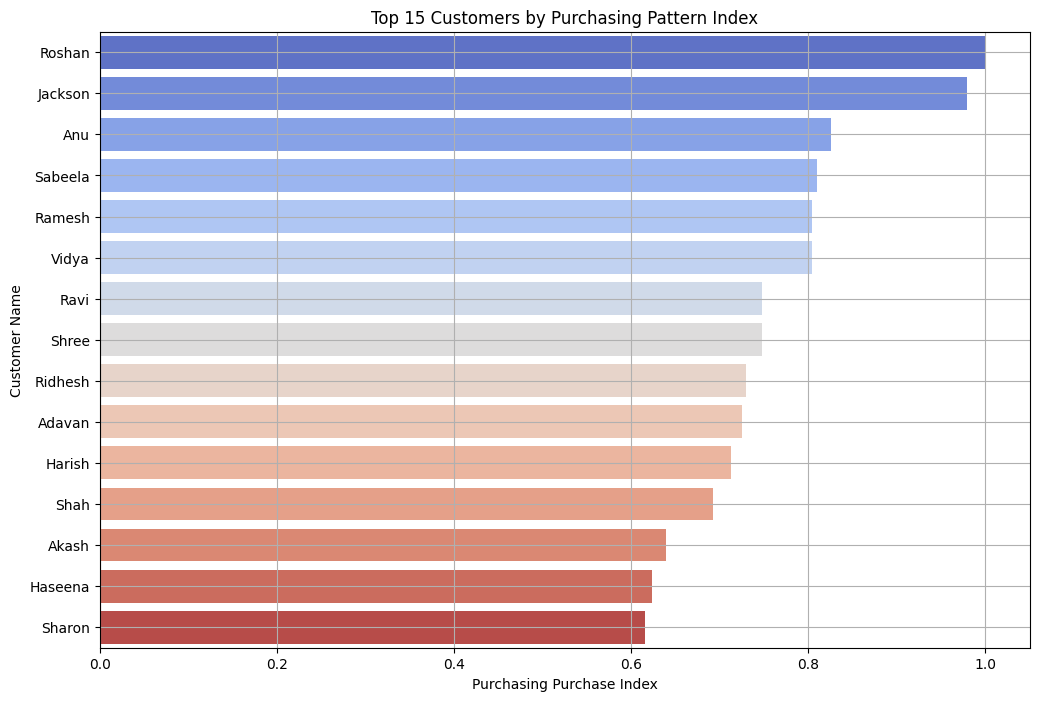

In [36]:
#Sort by Purchasing Patten Index and plot
top_purchasers = purchasing_pattern.sort_values(by="Purchasing Pattern Index",ascending=False).head(15)

#Visualization using Bar plot
plt.figure(figsize=(12,8))
sns.barplot(data=top_purchasers,y="Customer Name",x="Purchasing Pattern Index",hue="Customer Name", palette="coolwarm")
plt.title("Top 15 Customers by Purchasing Pattern Index")
plt.ylabel("Customer Name")
plt.xlabel("Purchasing Purchase Index")
plt.grid(True)
plt.show()

In [37]:
#Segmentation based on PPI
def assign_segment(row):
    if row["Purchasing Pattern Index"] > 0.75:
        return "Loyalist"
    elif 0.5 <= row["Purchasing Pattern Index"]< 0.75:
        return "Frequent Buyer"
    else:
        return "At Risk"

#Customer Segmentation
purchasing_pattern["Purchasing Index Segmentation"]=purchasing_pattern.apply(assign_segment,axis=1)
purchasing_pattern.head()

,Customer Name,Avg_Purchase Frequency,Purchasing Pattern Index,Purchasing Index Segmentation
0,Adavan,1.035354,0.725345,Frequent Buyer
1,Aditi,1.010929,0.143099,At Risk
2,Akash,1.031746,0.639348,Frequent Buyer
3,Alan,1.026042,0.503364,Frequent Buyer
4,Amrish,1.013393,0.201835,At Risk


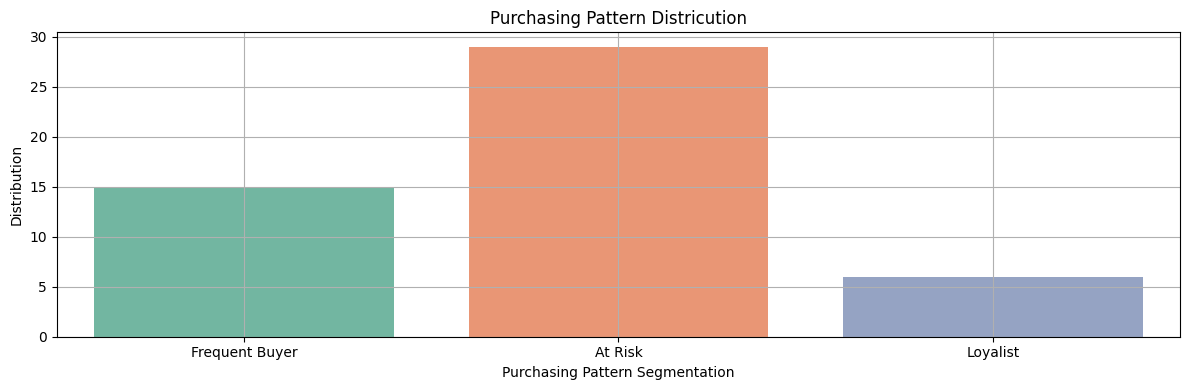

In [38]:
#Visualising Purchasing Pattern Index
plt.figure(figsize=(12,4))
sns.countplot(data=purchasing_pattern,x="Purchasing Index Segmentation",hue="Purchasing Index Segmentation",palette="Set2")
plt.title("Purchasing Pattern Districution")
plt.xlabel("Purchasing Pattern Segmentation")
plt.ylabel("Distribution")
plt.tight_layout()
plt.grid(True)
plt.show()

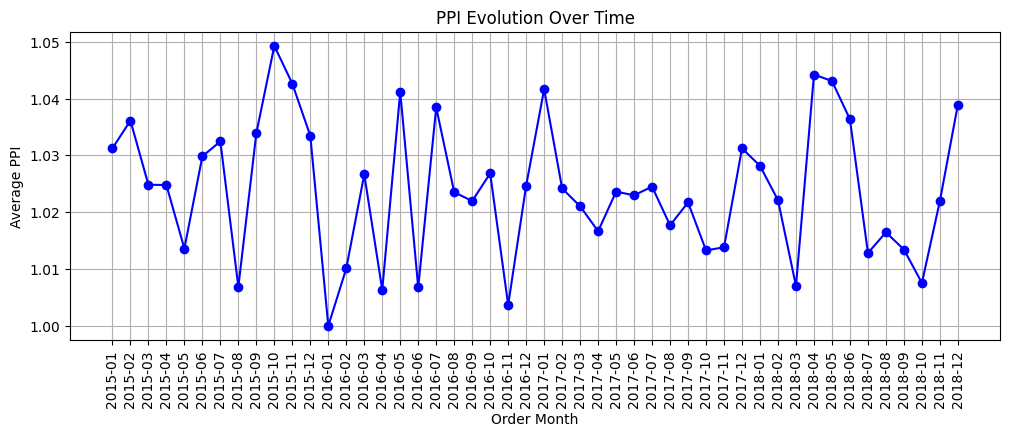

In [39]:
#Aggregate PPI over time 
ppi_trend = monthly_purchases.groupby(df_supermart["Order Date"].dt.to_period("M"))["Purchase Frequency"].mean().reset_index()
ppi_trend.rename(columns={"Purchase Frequency" : "Avg_PPI"},inplace =True)

#Plot the trend
plt.figure(figsize=(12,4))
plt.plot(ppi_trend["Order Date"].astype(str),ppi_trend["Avg_PPI"],color="blue",marker="o",label="Avg_PPI")
plt.title("PPI Evolution Over Time")
plt.ylabel("Average PPI")
plt.xlabel("Order Month")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


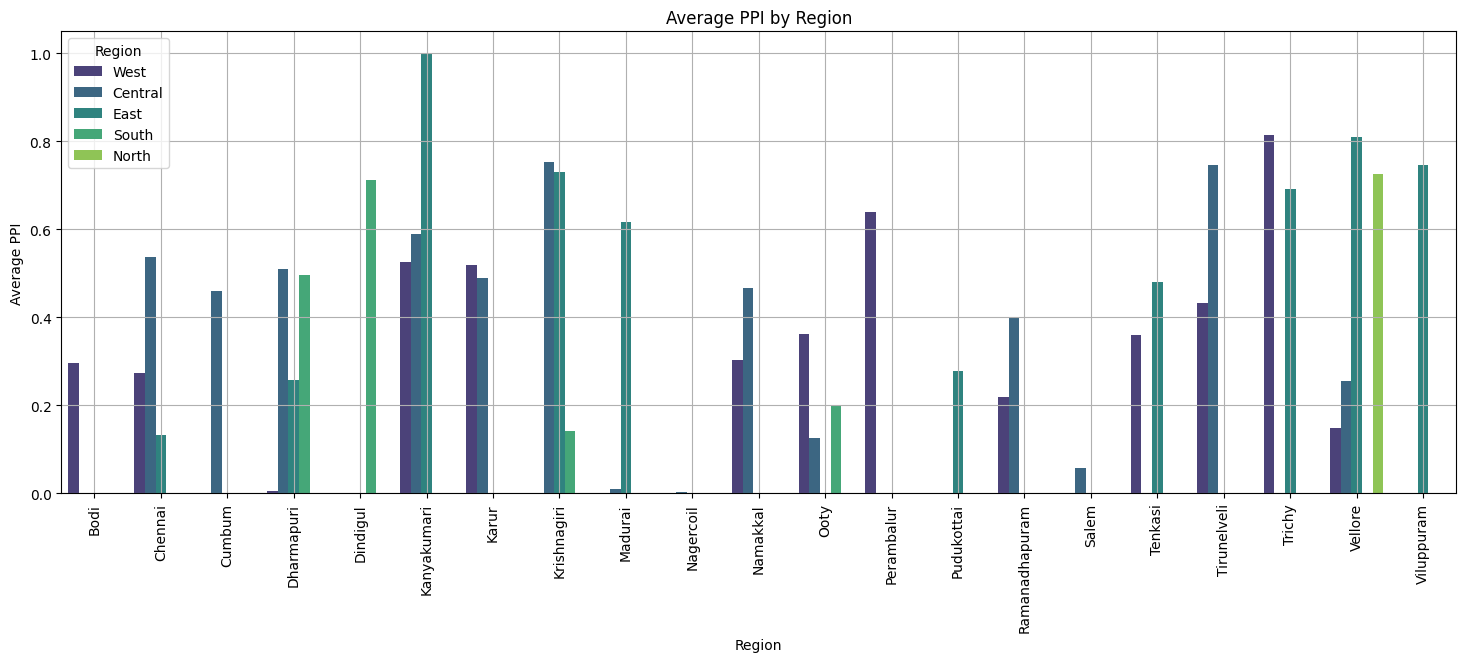

In [40]:
#Aggregate PPI over City and Region
ppi_by_region = purchasing_pattern.groupby([df_supermart["City"],df_supermart["Region"]])["Purchasing Pattern Index"].mean().reset_index()

#Plot the comparison
plt.figure(figsize=(18,6))
sns.barplot(data=ppi_by_region, x="City", y="Purchasing Pattern Index", hue="Region",palette="viridis")
plt.title("Average PPI by Region")
plt.xlabel("Region")
plt.ylabel("Average PPI")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [41]:
#Calculate total sales and profit for each customer
customer_value = df_supermart.groupby("Customer Name").agg({
    "Sales": "sum",
    "Profit":"sum"
}).reset_index()

#Normalise sales and profit to create scores
customer_value["Sales Score"] = (
    (customer_value["Sales"] - customer_value["Sales"].min())
    / (customer_value["Sales"].max() - customer_value["Sales"].min())
)
customer_value["Profit Score"] = (
    (customer_value["Profit"] - customer_value["Profit"].min())
    / (customer_value["Profit"].max() - customer_value["Profit"].min())
)
#Combine Scores with a weighted average to find PPI
#Weightage : Sales - 30% , Profit - 70%
customer_value["Customer Value Index"] = (
    0.7 * customer_value["Sales Score"] + 0.3 * customer_value["Profit Score"]
)
customer_value.head()


,Customer Name,Sales,Profit,Sales Score,Profit Score,Customer Value Index
0,Adavan,315341,78044.29,0.785171,0.634330,0.739918
1,Aditi,294789,76289.46,0.540020,0.560414,0.546138
2,Akash,305056,81026.86,0.662488,0.759960,0.691729
3,Alan,292030,73345.08,0.507109,0.436393,0.485894
4,Amrish,333351,80191.89,1.000000,0.724790,0.917437


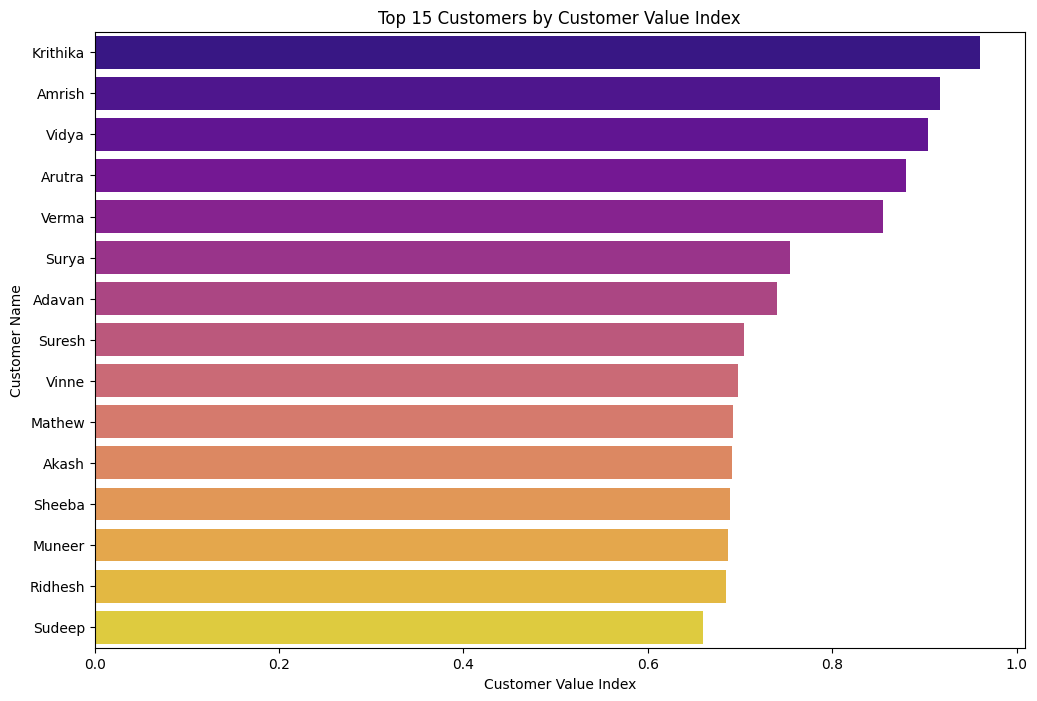

In [42]:
#Sort by Customer Value Index and Plot
top_value_customers = customer_value.sort_values(by="Customer Value Index",ascending=False).head(15)

plt.figure(figsize=(12,8))
sns.barplot(
    data=top_value_customers,
    y="Customer Name",
    x="Customer Value Index",
    hue="Customer Name",
    palette="plasma")
plt.title("Top 15 Customers by Customer Value Index")
plt.xlabel("Customer Value Index")
plt.ylabel("Customer Name")
plt.show()

In [43]:
#Segmentation based on CVI
def assign_segment(row):
    if row["Customer Value Index"] > 0.75:
        return "Elite Customer"
    elif 0.5 <= row["Customer Value Index"]< 0.75:
        return "Potential Grower"
    else:
        return "Value-Focused Customers"

#Customer Segmentation
customer_value["Customer Value Index Segmentation"]=customer_value.apply(assign_segment,axis=1)
customer_value.head()


,Customer Name,Sales,Profit,Sales Score,Profit Score,Customer Value Index,Customer Value Index Segmentation
0,Adavan,315341,78044.29,0.785171,0.634330,0.739918,Potential Grower
1,Aditi,294789,76289.46,0.540020,0.560414,0.546138,Potential Grower
2,Akash,305056,81026.86,0.662488,0.759960,0.691729,Potential Grower
3,Alan,292030,73345.08,0.507109,0.436393,0.485894,Value-Focused Customers
4,Amrish,333351,80191.89,1.000000,0.724790,0.917437,Elite Customer


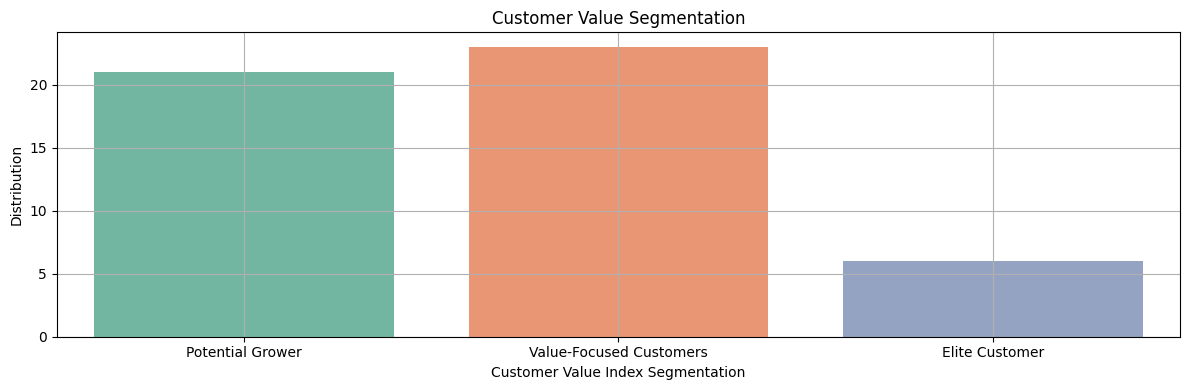

In [44]:
#Visualising Purchasing Pattern Index
plt.figure(figsize=(12,4))
sns.countplot(data=customer_value,x="Customer Value Index Segmentation",hue="Customer Value Index Segmentation",palette="Set2")
plt.title("Customer Value Segmentation")
plt.xlabel("Customer Value Index Segmentation")
plt.ylabel("Distribution")
plt.tight_layout()
plt.grid(True)
plt.show()

In [45]:
#Merge all the Indices of Customer Insights
final_data=CustomerScores.merge(purchasing_pattern, on="Customer Name",how ="left").merge(customer_value,on="Customer Name",how="left")
customer_insights = final_data[["Customer Name","Customer Segmentation","Segmentation Score","Purchasing Pattern Index","Customer Value Index Segmentation","Customer Value Index"]]

customer_insights.to_csv("CustomerInsights.csv",index=False)
customer_insights.head()


,Customer Name,Customer Segmentation,Segmentation Score,Purchasing Pattern Index,Customer Value Index Segmentation,Customer Value Index
0,Hussain,Intermitted Shoppers,5,0.590644,Potential Grower,0.601194
1,Adavan,Seasonal Shoppers,3,0.725345,Potential Grower,0.739918
2,Surya,Loyalist,9,0.466847,Elite Customer,0.754717
3,Ridhesh,Intermitted Shoppers,5,0.729623,Potential Grower,0.684241
4,Shah,Intermitted Shoppers,6,0.692616,Potential Grower,0.645263


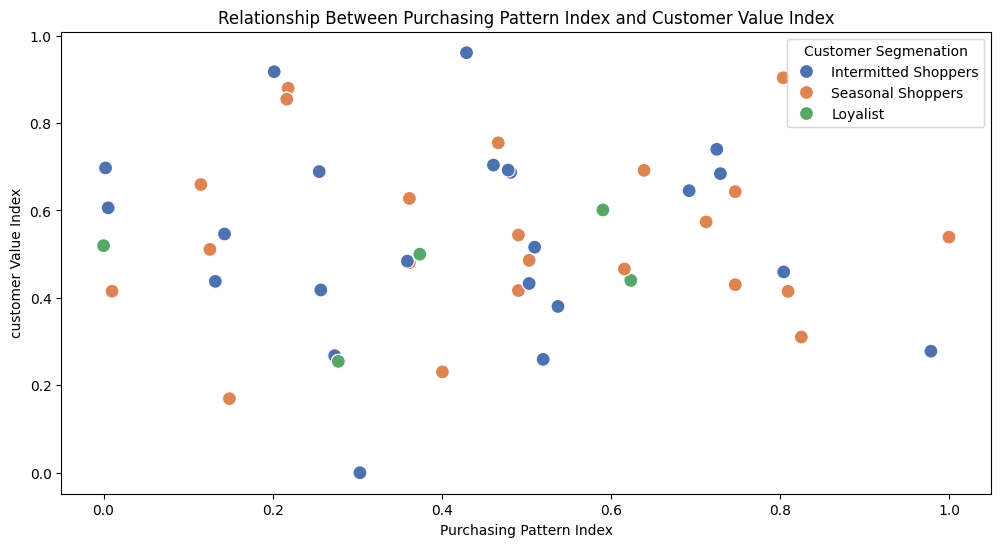

In [46]:
#Visualize Relationship between Purchasing Pattern and Customer Value Index
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=customer_insights,
    x="Purchasing Pattern Index",
    y="Customer Value Index",
    hue="Customer Segmentation",
    palette="deep",
    s=100
)
plt.title("Relationship Between Purchasing Pattern Index and Customer Value Index")
plt.xlabel("Purchasing Pattern Index")
plt.ylabel("customer Value Index")
plt.legend(title="Customer Segmenation")
plt.show()


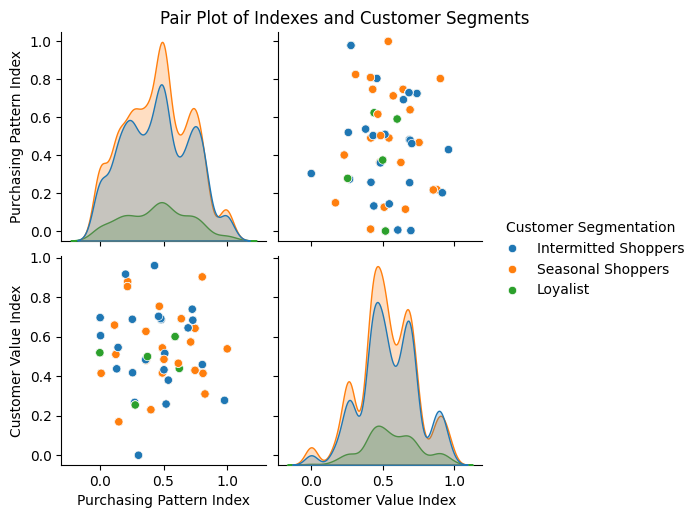

In [47]:
#Pair Plot for Comprehensive Analysis
sns.pairplot(customer_insights, vars=["Purchasing Pattern Index", "Customer Value Index"], hue="Customer Segmentation", palette="tab10")
plt.suptitle("Pair Plot of Indexes and Customer Segments", y=1.02)
plt.show()

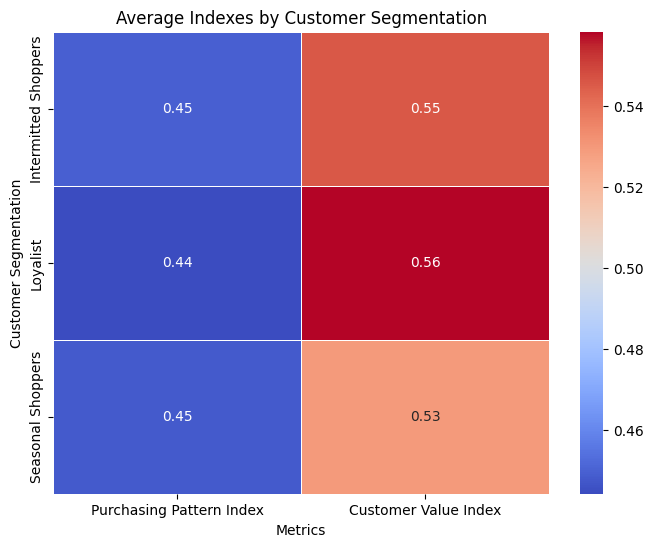

In [48]:
#Heatmap for Average Metrics by Segment
heatmap_data = customer_insights.groupby("Customer Segmentation")[["Purchasing Pattern Index","Customer Value Index"]].mean()

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data,annot=True,cmap="coolwarm",fmt=".2f",linewidth=0.5)
plt.title("Average Indexes by Customer Segmentation")
plt.xlabel("Metrics")
plt.show()


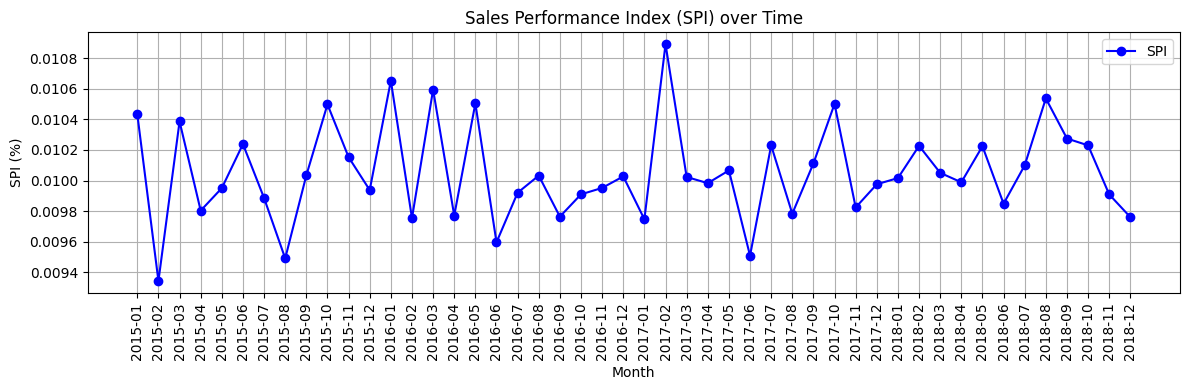

In [49]:
#SPI over Time
#Lets take Target Sales (mean sales + 300 for better analysis)
target_sales = df_supermart["Sales"].sum() + 300

#Calcualte Sales performance Index
df_supermart.loc[:,"SPI"] = (df_supermart["Sales"] / target_sales) * 100

#Group by Month to analyse sales performance over time
sales_by_month = df_supermart.groupby(df_supermart["Order Date"].dt.to_period("M")).agg(
    total_sales = ("Sales","sum"),
    SPI = ("SPI","mean")
).reset_index()

#Plot Sales Peformance Index (SPI) over time
plt.figure(figsize=(12,4))
plt.plot(sales_by_month["Order Date"].astype(str),sales_by_month["SPI"],color="blue",marker="o",label="SPI")
plt.title("Sales Performance Index (SPI) over Time")
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("SPI (%)")
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

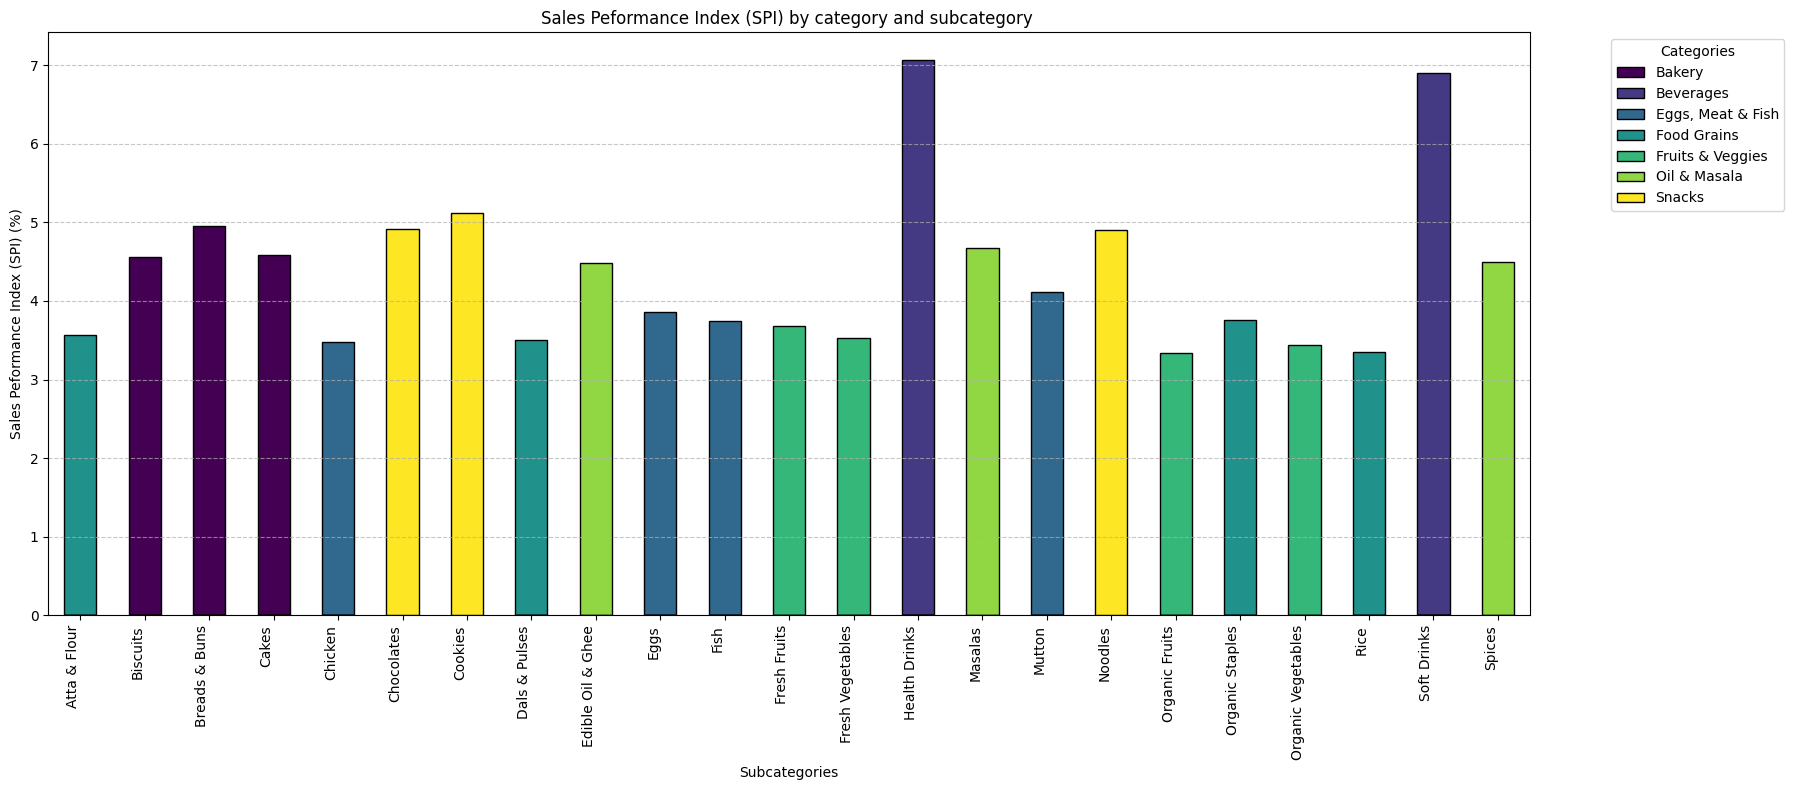

In [50]:
#Groupby category and sub-category for SPI Category calcualtion
sales_by_category = df_supermart.groupby(["Category","Sub Category"]).agg(
    total_sales = ("Sales","sum")
).reset_index()

#Calculate Sales Performance Index (SPI) by Category
sales_by_category["SPI"] = (sales_by_category["total_sales"] / target_sales) * 100


#Plotting SPI by category and sub-category
stacked_data = sales_by_category.pivot(index ="Sub Category",columns ="Category", values="SPI").fillna(0)

stacked_data.plot(kind="bar",stacked=True,figsize=(18,8),colormap="viridis",edgecolor="black")
plt.title("Sales Peformance Index (SPI) by category and subcategory ")
plt.xlabel("Subcategories")
plt.ylabel("Sales Peformance Index (SPI) (%)")
plt.xticks(rotation=90, ha="right")
plt.legend(title="Categories",bbox_to_anchor=(1.05,1),loc="upper left")
plt.tight_layout()
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()



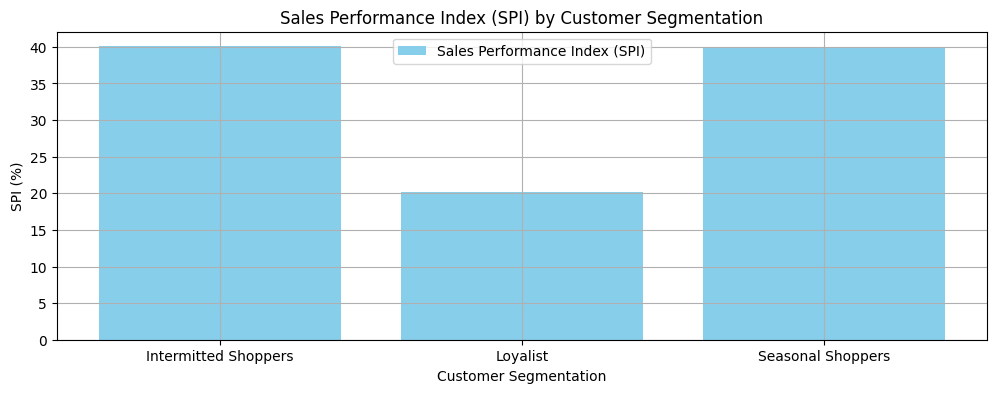

In [51]:
#Calculate SPI by Customer Segmentation
sales_by_segment = CustomerScores.groupby("Customer Segmentation")["Total Sales"].sum().reset_index()
sales_by_segment["SPI"] = (sales_by_segment["Total Sales"] / target_sales) * 100

#Plot bar Graph for SPI by Customer Segmentation
plt.figure(figsize=(12,4))
plt.bar(sales_by_segment["Customer Segmentation"],sales_by_segment["SPI"],color="skyblue",label="Sales Performance Index (SPI)")
plt.title("Sales Performance Index (SPI) by Customer Segmentation")
plt.xlabel("Customer Segmentation")
plt.ylabel("SPI (%)")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [52]:
#Combine Both
combine_SPI = pd.merge(sales_by_month,sales_by_category,on="SPI",how="right")
combine_SPI.head()

combine_SPI.to_csv("Sale Performance(SPI).csv",index=False)

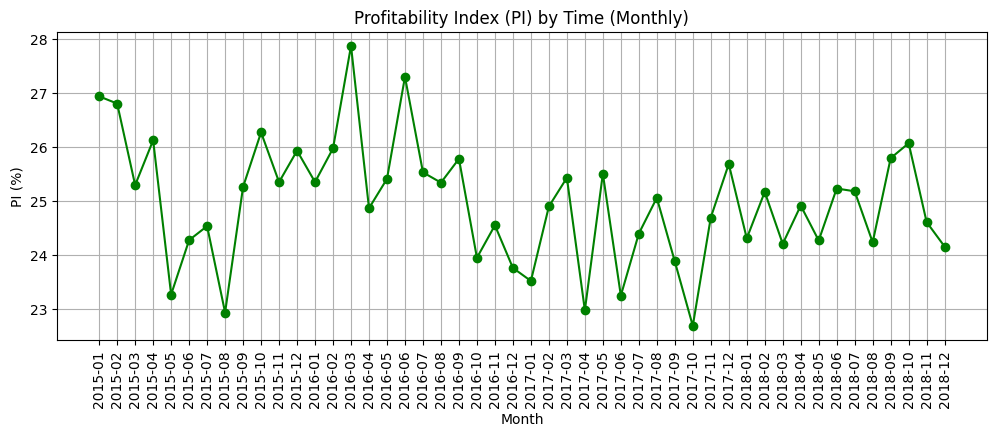

In [53]:
#Group by month for PI calculation (by time)
profit_by_month = df_supermart.groupby(df_supermart["Order Date"].dt.to_period("M"))["Profit"].sum().reset_index()

#Calcualting PI by time (Monthly)
profit_by_month["PI"] = (profit_by_month["Profit"] / sales_by_month["total_sales"]) * 100

#Plotting PI by time (monthly)
plt.figure(figsize=(12,4))
plt.plot(profit_by_month["Order Date"].astype(str),profit_by_month["PI"],color="green",marker="o")
plt.title("Profitability Index (PI) by Time (Monthly)")
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("PI (%)")
plt.grid(True)
plt.show()

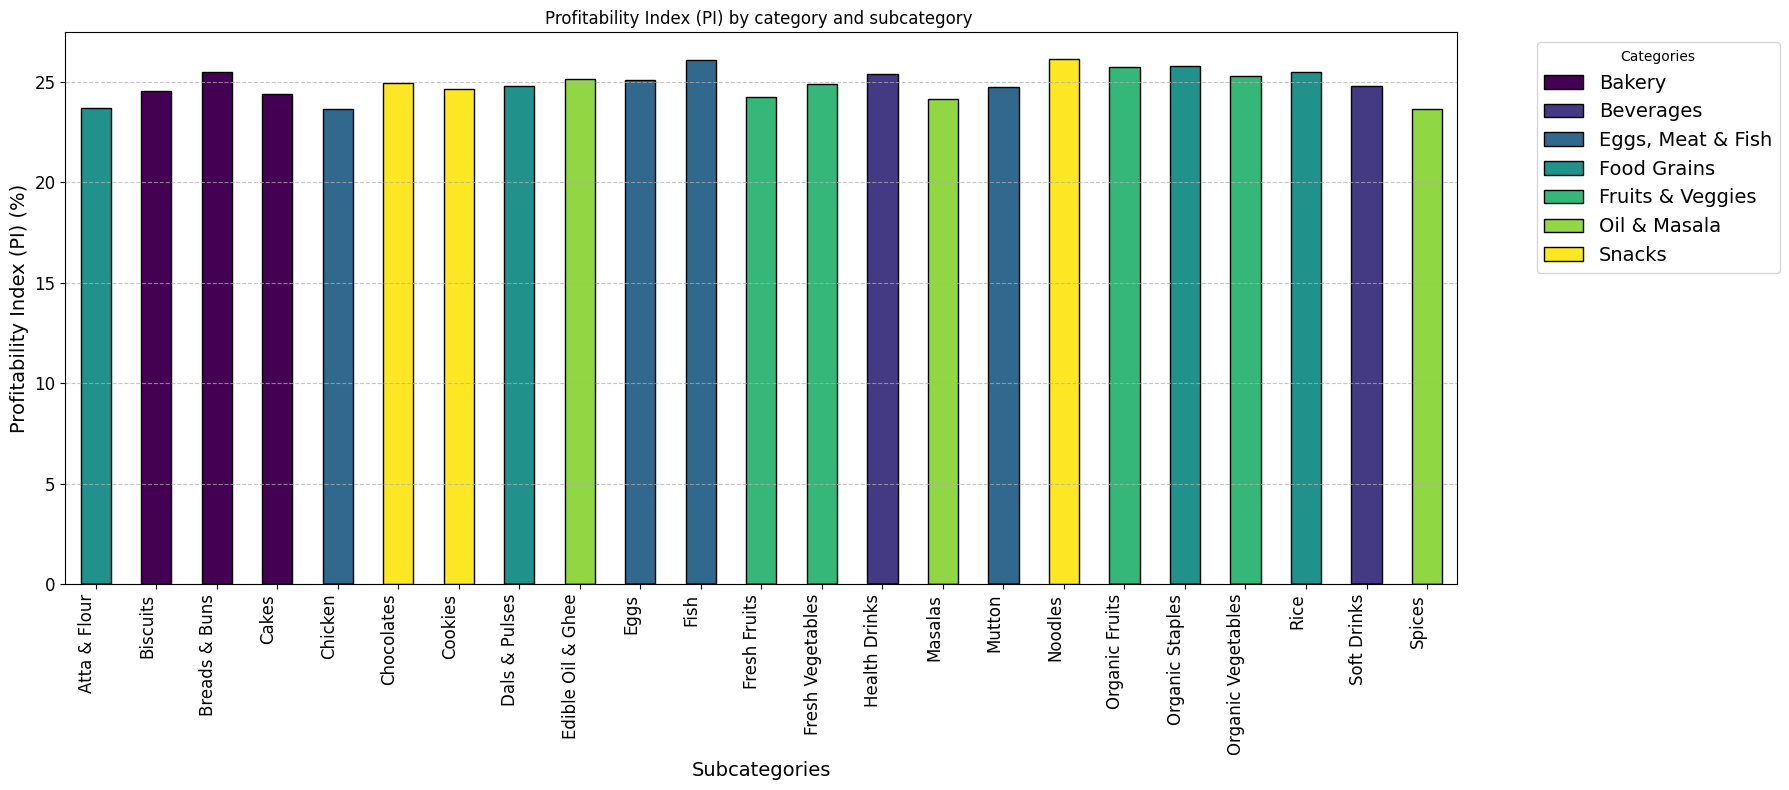

In [54]:
#Groupby category and sub-category for PI Category calcualtion
profit_by_category = df_supermart.groupby(["Category","Sub Category"]).agg(
    total_sales = ("Sales","sum"),
    total_profit = ("Profit","sum")
).reset_index()

#Calculate Profitability Index (PI) by Category
profit_by_category["PI"] = (profit_by_category["total_profit"] / profit_by_category["total_sales"]) * 100


#Plotting PI by category and sub-category
stacked_data = profit_by_category.pivot(index ="Sub Category",columns ="Category", values="PI").fillna(0)

stacked_data.plot(kind="bar",stacked=True,figsize=(18,8),colormap="viridis",edgecolor="black",fontsize=12)
plt.title("Profitability Index (PI) by category and subcategory ")
plt.xlabel("Subcategories",fontsize=14)
plt.ylabel("Profitability Index (PI) (%)",fontsize=14)
plt.xticks(rotation=90, ha="right")
plt.legend(title="Categories",bbox_to_anchor=(1.05,1),loc="upper left",fontsize=14)
plt.tight_layout()
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()

In [55]:
#COmbine Both
combine_PI = pd.merge(profit_by_month,profit_by_category, how="right", on="PI")

combine_PI.to_csv("Sale Performance(PI).csv",index=False)



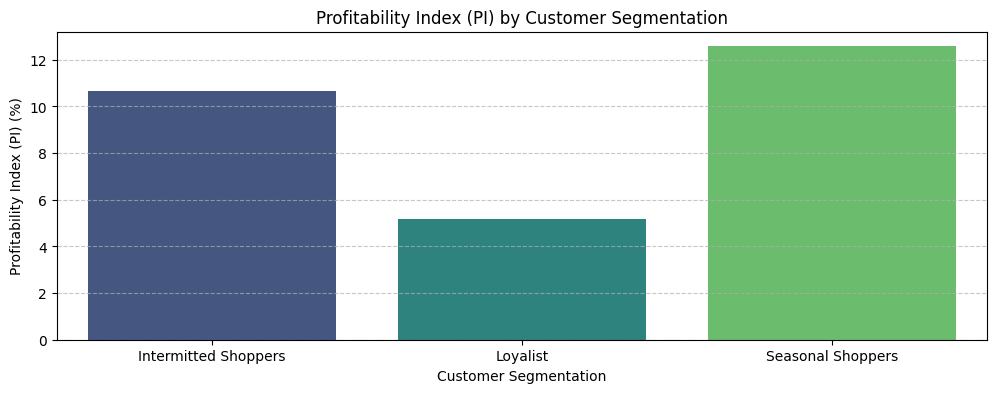

In [56]:
#calculate PI by Customer Segmentation
#merge profit data into CustomerScore DataFrame
segmentation_with_profit = pd.merge(
    CustomerScores,
    df_supermart[["Customer Name","Profit"]],
    on="Customer Name",
    how="left"
)

#Group by Segmentation and Calculate total Profit
profit_by_segment = segmentation_with_profit.groupby("Customer Segmentation").agg(
    total_sales=("Total Sales","sum"),
    total_profit=("Profit","sum")
).reset_index()

#Compute Profitability Index (PI)
profit_by_segment["PI"] = (profit_by_segment["total_profit"] / profit_by_segment["total_sales"]) * 100

#Plot the PI by Segmentation
plt.figure(figsize=(12,4))
sns.barplot(data=profit_by_segment, x="Customer Segmentation", y="PI", hue="Customer Segmentation",palette="viridis")
plt.title("Profitability Index (PI) by Customer Segmentation")
plt.xlabel("Customer Segmentation")
plt.ylabel("Profitability Index (PI) (%)")
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

Sales Forecasting Model - Using ARIMA (AutoRegression Integrated Moving Average)

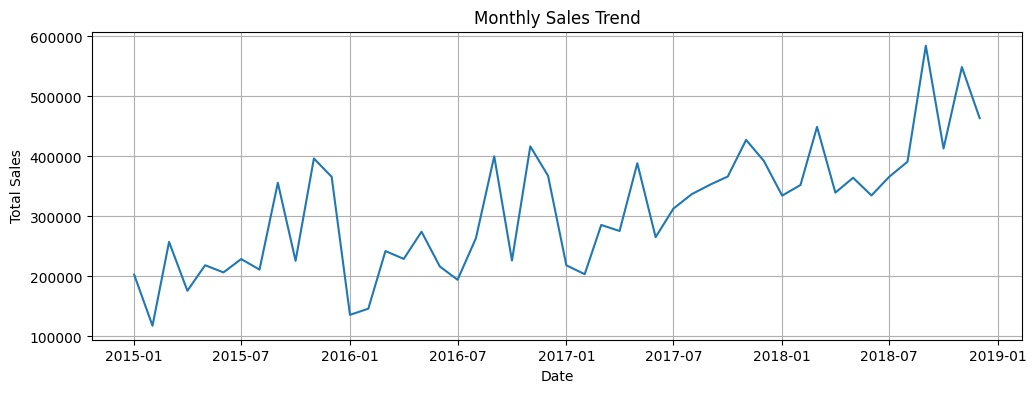

In [57]:
#Aggregate sales by month
monthly_sales = df_supermart.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()

#Convert periodIndex to datetime for modeling 
monthly_sales.index = monthly_sales.index.to_timestamp()

#Visualize the data
plt.figure(figsize=(12,4))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [58]:
#Check for Stationarity
#Perform ADF Test
adf_test = adfuller(monthly_sales)
print("ADF Statistics :",adf_test[0])
print("p-value:",adf_test[1])

if adf_test[1] <= 0.05:
    print("The series is stationary")
else:
    print("The series is not stationary. Deferencing is needed")

ADF Statistics : 0.9736413351004324
p-value: 0.9939798997336886
The series is not stationary. Deferencing is needed


In [59]:
#Differencing the data
differenced_data = monthly_sales.diff().dropna()

#Check stationary again after differencing
adf_test_diff = adfuller(differenced_data)
print("ADF Statistic after differencing:",adf_test_diff[0])
print("p-value after differncing:",adf_test_diff[1])

ADF Statistic after differencing: -5.830782626329863
p-value after differncing: 3.97983964242151e-07


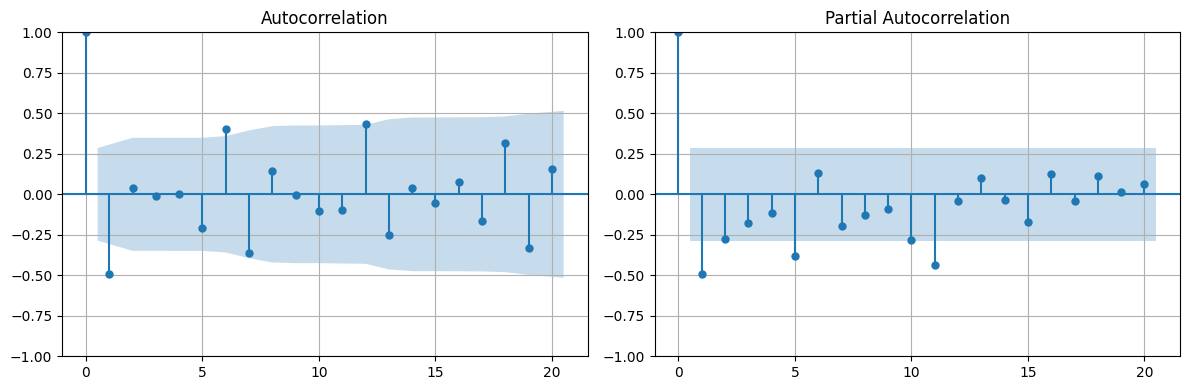

In [60]:
#Plot ACF and PACF
plt.figure(figsize=(12,4))
plt.subplot(121)
plot_acf(differenced_data, ax=plt.gca(), lags=20)
plt.grid(True)
plt.subplot(122)
plot_pacf(differenced_data, ax=plt.gca(), lags=20)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\anush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


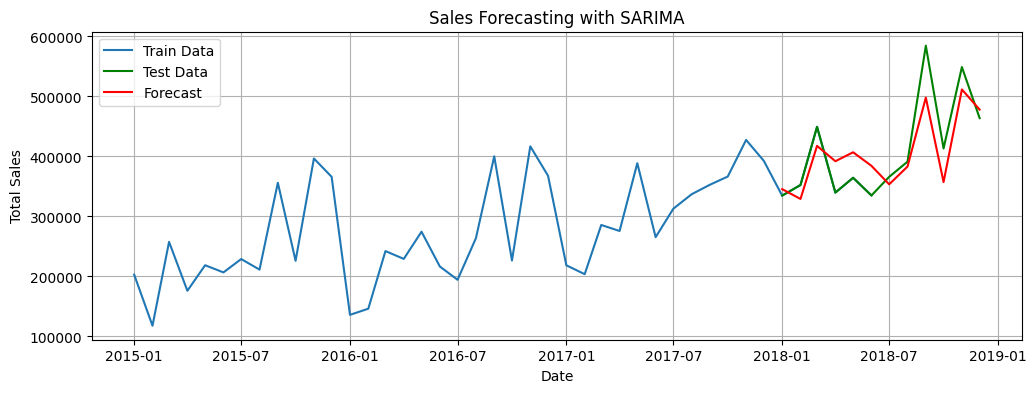

In [61]:
#Split the data into training and test sets
train = monthly_sales[ : -6] #Train on all but the last 12 months
test = monthly_sales[-12 : ]   #Test on the last 12 months

#Build SARIMA model (Seasonal ARIMA, as it accounts for seasonality)
sarima_model = SARIMAX(train,
                      order = (2,1,1),
                      seasonal_order=(1,1,1,12),
                      enforce_stationarity=False,
                      enforce_invertibility=False
                     )


#Fill the model
sarima_result = sarima_model.fit(disp=False)

#Forecast the future sales
forecast = sarima_result.predict(start=test.index[0], end=test.index[-1], dynamic=False)

#Plot the actual vs. Predicted sales
plt.figure(figsize=(12,4))
plt.plot(train,label="Train Data")
plt.plot(test, label="Test Data",color="green")
plt.plot(forecast,label="Forecast",color="red")
plt.title("Sales Forecasting with SARIMA")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
#Calculate RMSE (Root Mean Squared Error) to evaluate model performance
error=rmse(test,forecast)
print(f"RMSE : {error:.2f}")

#Calculate MAE or MAPE for surther evaluation
mae =  mean_absolute_error(test,forecast)
print(f"Mean Absolute Error (MAE):{mae:.2f}")

RMSE : 41900.49
Mean Absolute Error (MAE):35370.81


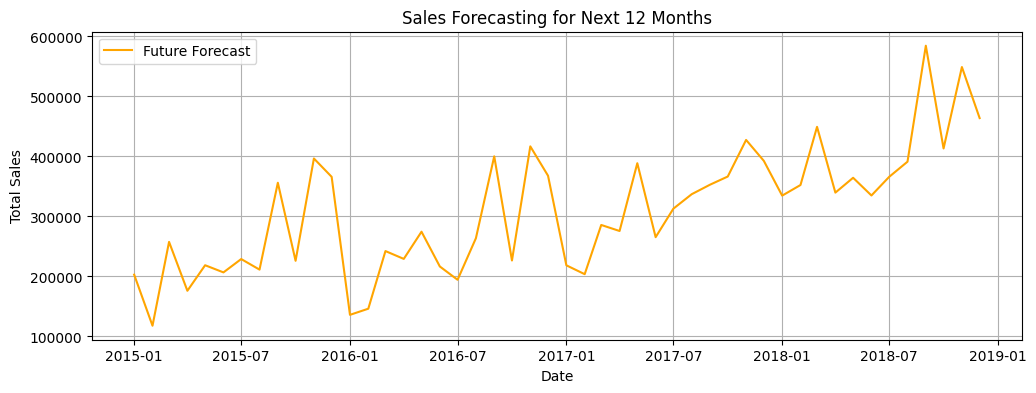

In [63]:
#Forecast for the next 12 months
future_forecast = sarima_result.predict(start = monthly_sales.index[-1] + pd.DateOffset(months=1),
                                        end=monthly_sales.index[-1] + pd.DateOffset(months=12),
                                        dynamic=False)

#Plot the future forecast
plt.figure(figsize=(12,4))
plt.plot(monthly_sales,label="Future Forecast",color="orange")
plt.title("Sales Forecasting for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()

Promotional Effectiveness Analysis : How well pomotions are driving sales and customer aquisition

In [64]:
#define a discount for promotions
threshold = 0.15 # Discount :20% 
df_supermart["is_promotion"] = df_supermart["Discount"] > threshold

#Apply K-means clustering to the Discount column
kmeans = KMeans(n_clusters=2, random_state=0)
df_supermart["Discount Cluster"] = kmeans.fit_predict(df_supermart[["Discount"]])
                                                      
#Label Clusters as promotion/non-promotion based on average discount
cluster_mean_discounts = df_supermart.groupby("Discount Cluster")["Discount"].mean()
promotion_cluster = cluster_mean_discounts.idxmax()
df_supermart["is_promotion"] = df_supermart["Discount Cluster"] == promotion_cluster

In [65]:
#Seperate sales into promotion and non-promotion groups
promotion_sales = df_supermart[df_supermart["is_promotion"] == True]
non_promotion_sales = df_supermart[df_supermart["is_promotion"] == False]

#Calculate average sales for both groups
promotion_sales_avg = promotion_sales["Sales"].mean()
non_promotion_sales_avg = non_promotion_sales["Sales"].mean()

#Calculate Promotion Impact Score
promotion_impact_score = ((promotion_sales_avg - non_promotion_sales_avg) / non_promotion_sales_avg) * 100 
print(f"Promotion Impact Score : {promotion_impact_score: .5f}%")

Promotion Impact Score : -0.53327%


In [66]:
#Calcualte new customers during promotions and non-promotion
promotion_customers = promotion_sales["Customer_Id"].nunique()
non_promotion_customers = non_promotion_sales["Customer_Id"].nunique()
non_promotion_customers

#Calculate Aquisition Rate
customer_acquisition_rate = (promotion_customers / (promotion_customers + non_promotion_customers)) * 100
print(f"Customer Aquisition Rate : {customer_acquisition_rate:.2f}%")

Customer Aquisition Rate : 48.18%


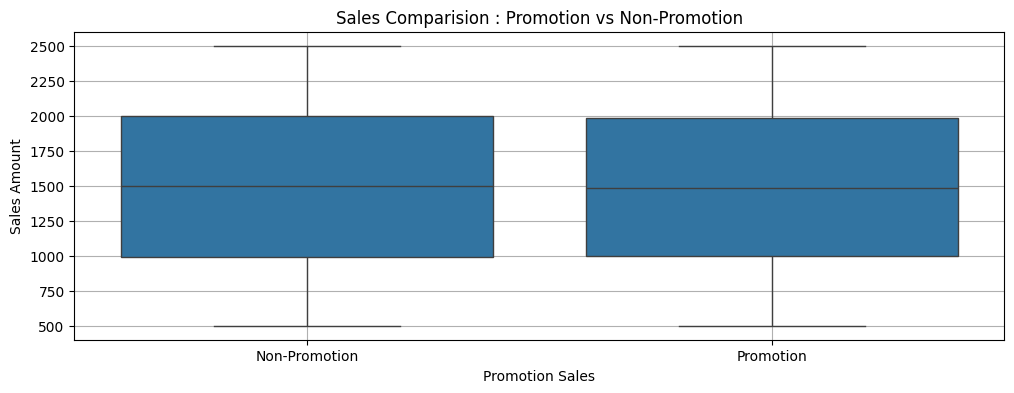

In [67]:
#Sales Comparision by Discount Groups
#Boxplot of sales by promotion status
plt.figure(figsize=(12,4))
sns.boxplot(data=df_supermart,x="is_promotion",y="Sales")
plt.title("Sales Comparision : Promotion vs Non-Promotion")
plt.xlabel("Promotion Sales")
plt.ylabel("Sales Amount")
plt.xticks([0,1],["Non-Promotion","Promotion"])
plt.grid(True)
plt.show()

In [77]:
#Calculate avg profits
promotion_profit_avg = promotion_sales["Profit"].mean()
non_promotion_profit_avg = non_promotion_sales["Profit"].mean()

#Calculate profit impact score
profit_impact_score = ((promotion_profit_avg - non_promotion_profit_avg) 
                       / non_promotion_profit_avg) * 100
print(f"Profit Impact Score : {profit_impact_score:.2f}%")


Profit Impact Score : 0.22%


In [69]:
retained_customers = set(promotion_sales["Customer Name"]).intersection(
    set(non_promotion_sales["Customer Name"]))
retention_rate = (len(retained_customers) / promotion_customers) * 100
print(f"Customer Retention Rate: { retention_rate:.2f}%")

Customer Retention Rate: 1.71%


                SUPERMART BUSINESS PERFORMANCE ANALYSIS REPORT